### Necessary Imports + Read in Airbnb Listings CSV

In [119]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import pearsonr


data = pd.read_csv('C:/Users/j-tic/Downloads/airbnb_listings.csv')
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.66,4.82,NaN,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.88,4.64,4.78,NaN,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.90,4.63,4.74,NaN,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.97,4.77,4.85,NaN,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.75,4.34,4.55,NaN,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,https://www.airbnb.com/rooms/712909401324393615,20220911231053,2022-09-12,city scrape,Comfortable double room with private bathroom,Comfortable double room with private bathroom ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,38652370,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
7562,712914322433199115,https://www.airbnb.com/rooms/712914322433199115,20220911231053,2022-09-12,city scrape,Welcome 1-bedroom available. Free parking & Wi-Fi,Single room available in family home. Bus rout...,NaN,https://a0.muscache.com/pictures/4c044921-f6fd...,89156390,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
7563,712914393022526732,https://www.airbnb.com/rooms/712914393022526732,20220911231053,2022-09-11,city scrape,Cheerful 5-bedroom Home Friendly Irish Welcome,Forget your worries in this spacious and seren...,"Fantastic transport routes, 5 mins from luas g...",https://a0.muscache.com/pictures/53ed618c-3c14...,128213034,...,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN
7564,712966369602352444,https://www.airbnb.com/rooms/712966369602352444,20220911231053,2022-09-12,city scrape,Double Bedroom in Private Home,Large double room with panoramic views of Fr. ...,Clongriffin dart station and 15 bus close by. ...,https://a0.muscache.com/pictures/miso/Hosting-...,256847071,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN


### Performing data cleaning and normalization

In [120]:
#Dropping empty columns
no_empty_data = data.drop(['license', 'calendar_updated','neighbourhood_group_cleansed','bathrooms'], axis = 1)
no_empty_data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,https://www.airbnb.com/rooms/712909401324393615,20220911231053,2022-09-12,city scrape,Comfortable double room with private bathroom,Comfortable double room with private bathroom ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,38652370,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
7562,712914322433199115,https://www.airbnb.com/rooms/712914322433199115,20220911231053,2022-09-12,city scrape,Welcome 1-bedroom available. Free parking & Wi-Fi,Single room available in family home. Bus rout...,NaN,https://a0.muscache.com/pictures/4c044921-f6fd...,89156390,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
7563,712914393022526732,https://www.airbnb.com/rooms/712914393022526732,20220911231053,2022-09-11,city scrape,Cheerful 5-bedroom Home Friendly Irish Welcome,Forget your worries in this spacious and seren...,"Fantastic transport routes, 5 mins from luas g...",https://a0.muscache.com/pictures/53ed618c-3c14...,128213034,...,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN
7564,712966369602352444,https://www.airbnb.com/rooms/712966369602352444,20220911231053,2022-09-12,city scrape,Double Bedroom in Private Home,Large double room with panoramic views of Fr. ...,Clongriffin dart station and 15 bus close by. ...,https://a0.muscache.com/pictures/miso/Hosting-...,256847071,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN


In [121]:
#deleting the % signal in the data
columns_to_modify = ['host_response_rate', 'host_acceptance_rate']

# Function to remove "%" using list comprehension
def remove_percent(no_empty_data, columns):
  for col in columns:
    no_empty_data[col] = no_empty_data[col].str.replace("%", "", regex=True).astype(float)
  return no_empty_data

# Apply the function to modify the DataFrame
data_modified = remove_percent(no_empty_data.copy(), columns_to_modify.copy())

data_modified

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.93,4.93,4.66,4.82,f,2,0,2,0,1.85
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.90,4.88,4.64,4.78,f,2,0,2,0,1.53
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.86,4.90,4.63,4.74,f,3,0,3,0,2.78
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.95,4.97,4.77,4.85,f,2,0,2,0,3.68
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.81,4.75,4.34,4.55,t,5,5,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,https://www.airbnb.com/rooms/712909401324393615,20220911231053,2022-09-12,city scrape,Comfortable double room with private bathroom,Comfortable double room with private bathroom ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,38652370,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
7562,712914322433199115,https://www.airbnb.com/rooms/712914322433199115,20220911231053,2022-09-12,city scrape,Welcome 1-bedroom available. Free parking & Wi-Fi,Single room available in family home. Bus rout...,NaN,https://a0.muscache.com/pictures/4c044921-f6fd...,89156390,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
7563,712914393022526732,https://www.airbnb.com/rooms/712914393022526732,20220911231053,2022-09-11,city scrape,Cheerful 5-bedroom Home Friendly Irish Welcome,Forget your worries in this spacious and seren...,"Fantastic transport routes, 5 mins from luas g...",https://a0.muscache.com/pictures/53ed618c-3c14...,128213034,...,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN
7564,712966369602352444,https://www.airbnb.com/rooms/712966369602352444,20220911231053,2022-09-12,city scrape,Double Bedroom in Private Home,Large double room with panoramic views of Fr. ...,Clongriffin dart station and 15 bus close by. ...,https://a0.muscache.com/pictures/miso/Hosting-...,256847071,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN


In [5]:
#Cleaning the rows with missing values
def clean_data_mean(data_modified):
 
  return data_modified.fillna(data_modified.mean())

cleaned_data_mean = clean_data_mean(data_modified.copy())
cleaned_data_mean

C:\Users\j-tic\AppData\Local\Temp\ipykernel_22924\4196796804.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return data_modified.fillna(data_modified.mean())


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.930000,4.930000,4.660000,4.820000,f,2,0,2,0,1.850000
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.900000,4.880000,4.640000,4.780000,f,2,0,2,0,1.530000
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.860000,4.900000,4.630000,4.740000,f,3,0,3,0,2.780000
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.950000,4.970000,4.770000,4.850000,f,2,0,2,0,3.680000
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.810000,4.750000,4.340000,4.550000,t,5,5,0,0,0.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,https://www.airbnb.com/rooms/712909401324393615,20220911231053,2022-09-12,city scrape,Comfortable double room with private bathroom,Comfortable double room with private bathroom ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,38652370,...,4.828653,4.843747,4.732065,4.614547,f,1,0,1,0,1.319006
7562,712914322433199115,https://www.airbnb.com/rooms/712914322433199115,20220911231053,2022-09-12,city scrape,Welcome 1-bedroom available. Free parking & Wi-Fi,Single room available in family home. Bus rout...,NaN,https://a0.muscache.com/pictures/4c044921-f6fd...,89156390,...,4.828653,4.843747,4.732065,4.614547,f,2,0,2,0,1.319006
7563,712914393022526732,https://www.airbnb.com/rooms/712914393022526732,20220911231053,2022-09-11,city scrape,Cheerful 5-bedroom Home Friendly Irish Welcome,Forget your worries in this spacious and seren...,"Fantastic transport routes, 5 mins from luas g...",https://a0.muscache.com/pictures/53ed618c-3c14...,128213034,...,4.828653,4.843747,4.732065,4.614547,t,2,0,2,0,1.319006
7564,712966369602352444,https://www.airbnb.com/rooms/712966369602352444,20220911231053,2022-09-12,city scrape,Double Bedroom in Private Home,Large double room with panoramic views of Fr. ...,Clongriffin dart station and 15 bus close by. ...,https://a0.muscache.com/pictures/miso/Hosting-...,256847071,...,4.828653,4.843747,4.732065,4.614547,t,1,0,1,0,1.319006


In [6]:
#Checking the datatypes
cleaned_data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   int64  
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [7]:
#casting the datatye I am goin to use
if cleaned_data_mean['price'].dtype == 'object':
    cleaned_data_mean['price'] = cleaned_data_mean['price'].str.replace('[\$,]', '', regex=True).astype(float)
else:
    cleaned_data_mean['price'] = pd.to_numeric(cleaned_data_mean['price'], errors='coerce')
cleaned_data_mean

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,https://www.airbnb.com/rooms/44077,20220911231053,2022-09-12,city scrape,cosy comfortable Irish cottage twin,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,https://a0.muscache.com/pictures/525706/050a3a...,193005,...,4.930000,4.930000,4.660000,4.820000,f,2,0,2,0,1.850000
1,85156,https://www.airbnb.com/rooms/85156,20220911231053,2022-09-12,city scrape,Cosy Comfortable Irish Cottage 1 Double Bed,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",https://a0.muscache.com/pictures/1749253/9ed2a...,193005,...,4.900000,4.880000,4.640000,4.780000,f,2,0,2,0,1.530000
2,159889,https://www.airbnb.com/rooms/159889,20220911231053,2022-09-12,city scrape,Friendly Single Room,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,https://a0.muscache.com/pictures/3031697/a8259...,766611,...,4.860000,4.900000,4.630000,4.740000,f,3,0,3,0,2.780000
3,162809,https://www.airbnb.com/rooms/162809,20220911231053,2022-09-11,city scrape,5.5 miles south of Dublin City :^),A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",https://a0.muscache.com/pictures/86694529/c07b...,777681,...,4.950000,4.970000,4.770000,4.850000,f,2,0,2,0,3.680000
4,165828,https://www.airbnb.com/rooms/165828,20220911231053,2022-09-11,city scrape,Pádraig Pearse apt. Kilmainham,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",https://a0.muscache.com/pictures/34311419/b3f6...,790601,...,4.810000,4.750000,4.340000,4.550000,t,5,5,0,0,0.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,712909401324393615,https://www.airbnb.com/rooms/712909401324393615,20220911231053,2022-09-12,city scrape,Comfortable double room with private bathroom,Comfortable double room with private bathroom ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,38652370,...,4.828653,4.843747,4.732065,4.614547,f,1,0,1,0,1.319006
7562,712914322433199115,https://www.airbnb.com/rooms/712914322433199115,20220911231053,2022-09-12,city scrape,Welcome 1-bedroom available. Free parking & Wi-Fi,Single room available in family home. Bus rout...,NaN,https://a0.muscache.com/pictures/4c044921-f6fd...,89156390,...,4.828653,4.843747,4.732065,4.614547,f,2,0,2,0,1.319006
7563,712914393022526732,https://www.airbnb.com/rooms/712914393022526732,20220911231053,2022-09-11,city scrape,Cheerful 5-bedroom Home Friendly Irish Welcome,Forget your worries in this spacious and seren...,"Fantastic transport routes, 5 mins from luas g...",https://a0.muscache.com/pictures/53ed618c-3c14...,128213034,...,4.828653,4.843747,4.732065,4.614547,t,2,0,2,0,1.319006
7564,712966369602352444,https://www.airbnb.com/rooms/712966369602352444,20220911231053,2022-09-12,city scrape,Double Bedroom in Private Home,Large double room with panoramic views of Fr. ...,Clongriffin dart station and 15 bus close by. ...,https://a0.muscache.com/pictures/miso/Hosting-...,256847071,...,4.828653,4.843747,4.732065,4.614547,t,1,0,1,0,1.319006


In [9]:
# Checking if the statistical analysis is acurated
cleaned_data_mean.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.566000e+03,7.566000e+03,7.566000e+03,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,...,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000
mean,1.265543e+17,2.022091e+13,1.165346e+08,94.377925,83.865665,24.575601,39.837959,53.345530,-6.254830,3.006080,...,4.645670,4.828653,4.843747,4.732065,4.614547,4.160983,2.362543,1.576394,0.183584,1.319006
std,2.581749e+17,1.191485e+00,1.257774e+08,10.772443,17.735418,202.623363,340.458134,0.049009,0.063257,1.888488,...,0.475317,0.325551,0.306697,0.316091,0.396005,9.654986,7.650292,6.266196,1.507330,1.801518
min,4.407700e+04,2.022091e+13,4.398400e+04,0.000000,0.000000,1.000000,1.000000,53.181730,-6.526020,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.742072e+07,2.022091e+13,2.500539e+07,94.377925,83.865665,1.000000,1.000000,53.329160,-6.278058,2.000000,...,4.640000,4.828653,4.843747,4.672500,4.560000,1.000000,0.000000,0.000000,0.000000,0.190000
50%,2.798028e+07,2.022091e+13,6.773535e+07,94.377925,83.865665,1.000000,2.000000,53.344210,-6.259630,2.000000,...,4.710000,4.900000,4.910000,4.750000,4.630000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,5.034204e+07,2.022091e+13,1.624988e+08,100.000000,97.000000,3.000000,4.000000,53.357332,-6.233332,4.000000,...,4.950000,5.000000,5.000000,4.940000,4.840000,3.000000,1.000000,1.000000,0.000000,1.360000
max,7.130342e+17,2.022091e+13,4.787894e+08,100.000000,100.000000,2157.000000,12017.000000,53.635000,-6.052910,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,66.000000,55.000000,66.000000,20.000000,44.720000


In [10]:
#checking the mean
cleaned_data_mean['price'].mean()

182.32795268305577

It is possible to notice that the mean for pricing is too high based on rent for night, I need to vizualise it and apply the proper cleaning.

In [11]:
#Checking the max value for price
cleaned_data_mean['price'].max()

99149.0

In [33]:
#Performing the cleaning by creating a new dataset with the values for price under 10000, as the otlier was over it.
cleaned_data_no_otiliers = cleaned_data_mean[cleaned_data_mean["price"] <= 10000]
cleaned_data_no_otiliers['price'].mean()

169.24577528089887

With this cleanning it is possible to notice that the mean seens more accurated.

### Analysis 1: Best neighborhood based on price, review, avaliability in the next 30 days.

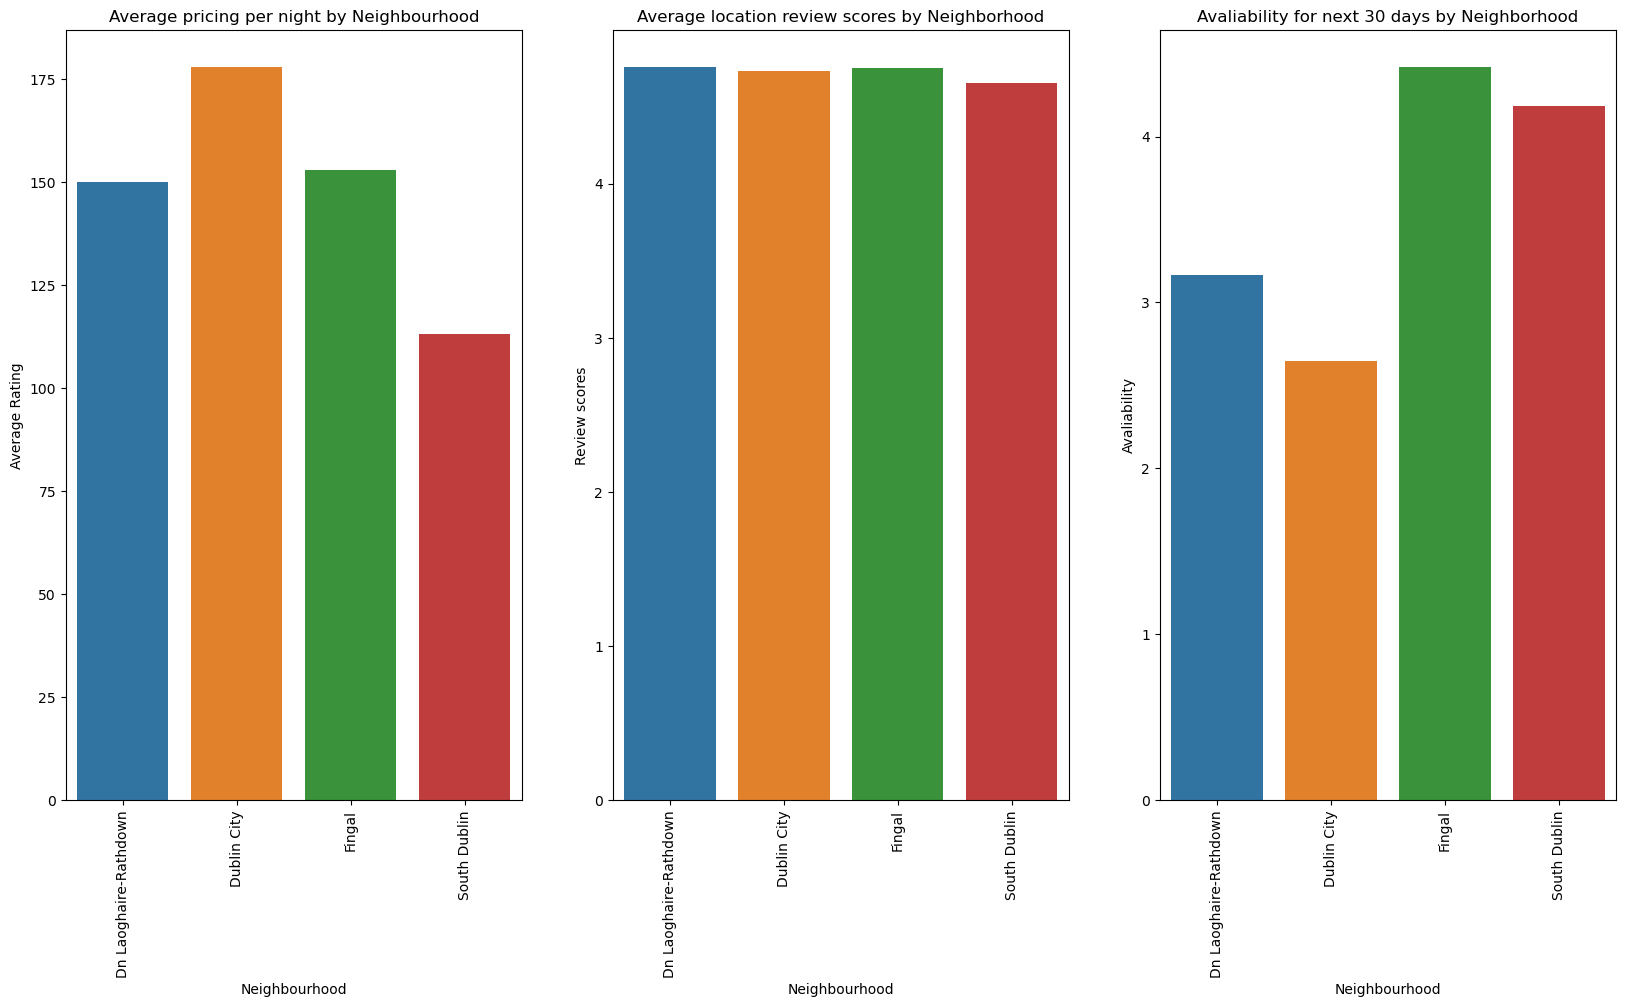

In [34]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
avg_pricing_by_neighbourhood = cleaned_data_no_otiliers.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
sns.barplot(x='neighbourhood_cleansed', y='price', data=avg_pricing_by_neighbourhood)
plt.xticks(rotation=90)
plt.title('Average pricing per night by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Rating')

plt.subplot(1,3,2)
avg_rating_by_neighbourhood = cleaned_data_no_otiliers.groupby('neighbourhood_cleansed')['review_scores_location'].mean().reset_index()
sns.barplot(x='neighbourhood_cleansed', y='review_scores_location', data=avg_rating_by_neighbourhood)
plt.xticks(rotation=90)
plt.title('Average location review scores by Neighborhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Review scores')

plt.subplot(1,3,3)
avg_rating_by_neighbourhood = cleaned_data_no_otiliers.groupby('neighbourhood_cleansed')['availability_30'].mean().reset_index()
sns.barplot(x='neighbourhood_cleansed', y='availability_30', data=avg_rating_by_neighbourhood)
plt.xticks(rotation=90)
plt.title('Avaliability for next 30 days by Neighborhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Avaliability')

plt.show()

###### The three graphs provide insights into different aspects four neighborhoods: Dn Laoghaire-Rathdown, Dublin City, Fingal, and South Dublin. Where:
Based on pricing: Dublin City has the highest average price, above 175, followed by Fingal with price slitly above 150, Dn Laoghaire-Rathdown, average price around 150, and South Dublin with the lowest average price, slightly above 120.
Based on Average Location Review Scores: South Dublin has the lowest average location score, slightly below 4.5, when the other neighbourhoods present a very similar average location score, around 4.5.
Based on Availability for Next 30 Days: Dublin City has the lowest availability, around 2, followed by Dn Laoghaire-Rathdown with availability around 3, South Dublin, around 4, and Fingal with the highest availability, around 5.
###### Analysing the three graphs it is possible to notice that:
Despite Dublin City having the highest average pricing, its location review scores are slightly lower than those of Fingal and Dn Laoghaire-Rathdown, which have similar but lower average prices.
South Dublin, with the lowest average pricing, has location review scores similar to Dublin City.
Fingal, with the second-highest average pricing, also has the highest availability, suggesting that higher prices might reduce occupancy.
Dublin City, with the highest average pricing, has the lowest availability, indicating a high-demand area despite the higher costs.
South Dublin, with the lowest average pricing, has high availability, indicating a potential over-supply or lower demand.
High location review scores are consistent across all neighborhoods, but higher scores do not necessarily correlate with lower availability. For example, Fingal has both high location scores and high availability.
###### With that analysis I can came across with some highlights, such as:
Best Neighborhoods for Renting:
South Dublin: With the lowest average pricing and high availability, South Dublin could be the most cost-effective neighborhood for budget-conscious travelers.
Dn Laoghaire-Rathdown: Offers a balance with moderate pricing and decent availability, making it a good option for those seeking value without sacrificing too much on cost.
High Demand Areas:
Dublin City: Despite higher prices, it has the lowest availability, indicating high demand. This neighborhood could be ideal for those willing to pay more for location and possibly better amenities or experiences.
Possibility of Overpricing or high-demand area:
The highest average pricing suggests premium listings, with low availability indicating high demand.
Fingal: The second-highest pricing with the highest availability suggests premium listings but might also indicate overpricing or oversupply of listings.
###### For cost-effective rentals, South Dublin and Dn Laoghaire-Rathdown are recommended due to their lower average prices and high location review scores. For those seeking high-demand areas with possibly better experiences, Dublin City is a strong choice despite higher costs. Fingal represents a premium option but may be less cost-effective due to its high pricing and availability.

#### Statistical Analysis

In [116]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Analysis of Variance for Price by Neighbourhood
anova_price = ols('price ~ C(neighbourhood_cleansed)', data=cleaned_data_no_otiliers).fit()
anova_table_price = sm.stats.anova_lm(anova_price, typ=2)
print("\nAnalysis of Variance for Price by Neighbourhood:")
print(anova_table_price)

# Analysis of Variance for Review Scores Location by Neighbourhood
anova_review_scores = ols('review_scores_location ~ C(neighbourhood_cleansed)', data=cleaned_data_no_otiliers).fit()
anova_table_review_scores = sm.stats.anova_lm(anova_review_scores, typ=2)
print("\nAnalysis of Variance for Review Scores Location by Neighbourhood:")
print(anova_table_review_scores)

# Analysis of Variance for Availability Next 30 Days by Neighbourhood
anova_availability = ols('availability_30 ~ C(neighbourhood_cleansed)', data=cleaned_data_no_otiliers).fit()
anova_table_availability = sm.stats.anova_lm(anova_availability, typ=2)
print("\nAnalysis of Variance for Availability Next 30 Days by Neighbourhood:")
print(anova_table_availability)


Analysis of Variance for Price by Neighbourhood:
                                 sum_sq      df         F    PR(>F)
C(neighbourhood_cleansed)  2.026765e+06     3.0  8.941392  0.000007
Residual                   5.712895e+08  7561.0       NaN       NaN

Analysis of Variance for Review Scores Location by Neighbourhood:
                               sum_sq      df          F        PR(>F)
C(neighbourhood_cleansed)    3.160291     3.0  10.583842  6.091382e-07
Residual                   752.561000  7561.0        NaN           NaN

Analysis of Variance for Availability Next 30 Days by Neighbourhood:
                                  sum_sq      df          F        PR(>F)
C(neighbourhood_cleansed)    2696.408427     3.0  25.025144  4.180612e-16
Residual                   271560.800561  7561.0        NaN           NaN


As we can see, the Analysis of Variance results reveal that there are significant differences in average price, review scores for location, and availability for the next 30 days across different neighbourhoods. This suggests that the neighbourhood has a significant impact on these three variables.

There is a statistically significant difference in the availability for the next 30 days, price and Review Scores Location across different neighbourhoods, as they all present very low p-value (PR).

### Analysis 2: Availability of listings over the last 90 days by listing type: entire homes, private rooms, and shared rooms.

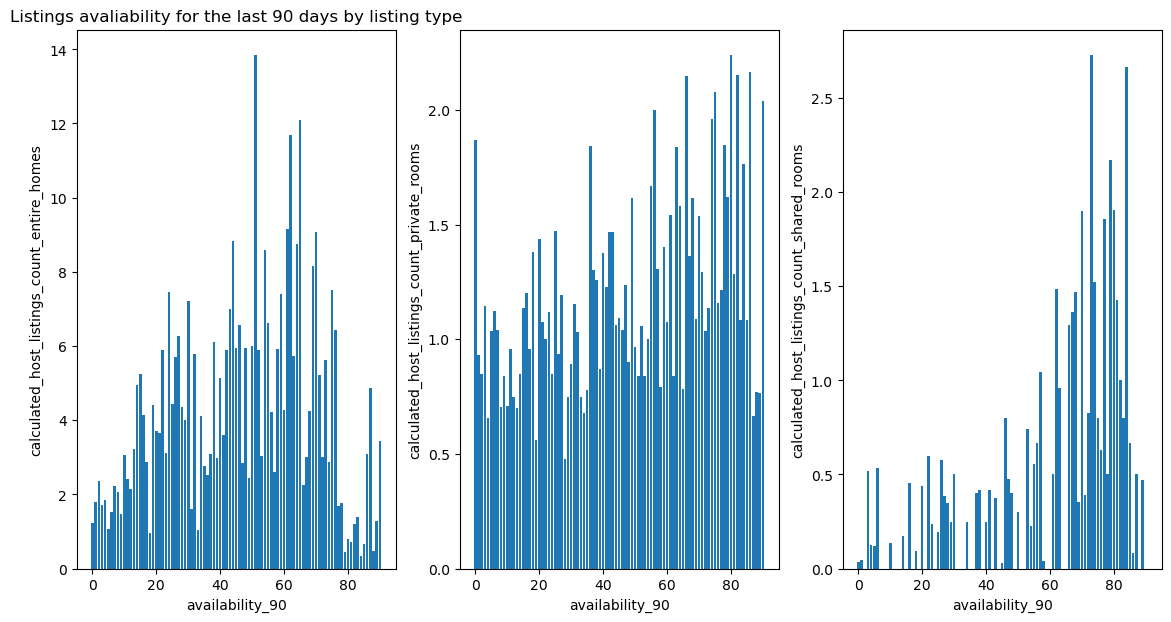

In [35]:
plt.figure(figsize=(14, 7))
plt.subplot(1,3,1)
plt.title('Listings avaliability for the last 90 days by listing type')
avg_review_scores_bedrooms = cleaned_data_no_otiliers.groupby('availability_90')['calculated_host_listings_count_entire_homes'].mean()
plt.bar(avg_review_scores_bedrooms.index, avg_review_scores_bedrooms.values)
plt.xlabel('availability_90')
plt.ylabel('calculated_host_listings_count_entire_homes')
plt.xticks(rotation=0)

plt.subplot(1,3,2)
avg_review_scores_accommodates = cleaned_data_no_otiliers.groupby('availability_90')['calculated_host_listings_count_private_rooms'].mean()
plt.bar(avg_review_scores_accommodates.index, avg_review_scores_accommodates.values)
plt.xlabel('availability_90')
plt.ylabel('calculated_host_listings_count_private_rooms')
plt.xticks(rotation=0)

plt.subplot(1,3,3)
avg_review_scores_accommodates = cleaned_data_no_otiliers.groupby('availability_90')['calculated_host_listings_count_shared_rooms'].mean()
plt.bar(avg_review_scores_accommodates.index, avg_review_scores_accommodates.values)
plt.xlabel('availability_90')
plt.ylabel('calculated_host_listings_count_shared_rooms')
plt.xticks(rotation=0)

plt.show()

###### These three bar charts show the availability of listings over the last 90 days, segmented by listing type: entire homes, private rooms, and shared rooms. The x-axis represents the availability in the last 90 days, and the y-axis represents the count of listings.
For Entire Homes, the availability ranges from 0 to 80+ days, with the highest peak around 40-60 days. There is a significant number of listings with high availability (more than 60 days).
For Private Rooms, the availability also ranges from 0 to 80+ days, but with a lower count of listings compared to entire homes. The distribution shows a more even spread across the range, with several peaks from 20 to 80 days.
Shared Rooms have a noticeable peak around 60-80 days of availability.

###### Analysing the three graphs it is possible to notice that based on availability and Listing Type:
Entire Homes have the highest number of listings overall, and a substantial number of them have high availability. This could indicate a higher supply relative to demand. Private Rooms have a more even distribution of availability, suggesting a balanced supply and demand. Shared Rooms have the lowest number of listings and higher availability, which could mean less demand for shared accommodations.
###### With that analysis I can came across with some highlights, such as: 
Cost-Effective Options:
Private Rooms: With an even distribution of availability and lower peaks compared to entire homes, private rooms might offer a balance between cost and availability. The even distribution of Private Rooms suggests a stable demand. Renting a private room could be a strategic choice if seeking moderate cost and reasonable availability. The peak around 60-80 days in Shared Room availability suggests these are less in demand for long term renting. For travelers who do not mind sharing spaces, these could provide economical options for long stays.
###### Private rooms appear to be the most balanced in terms of cost and availability, making them a cost-effective choice.


#### Statistical Analysis

In [118]:
# Correlation analysis
correlation_matrix = cleaned_data_no_otiliers[['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'availability_90']].corr()
print(correlation_matrix)

# Pearson correlation test)
pearson_corr_entire_homes, p_value_entire_homes = stats.pearsonr(cleaned_data_no_otiliers['calculated_host_listings_count_entire_homes'], cleaned_data_no_otiliers['availability_90'])
pearson_corr_private_rooms, p_value_private_rooms = stats.pearsonr(cleaned_data_no_otiliers['calculated_host_listings_count_private_rooms'], cleaned_data_no_otiliers['availability_90'])
pearson_corr_shared_rooms, p_value_shared_rooms = stats.pearsonr(cleaned_data_no_otiliers['calculated_host_listings_count_shared_rooms'], cleaned_data_no_otiliers['availability_90'])

print(f'Pearson correlation between Entire Homes and Availability 90: {pearson_corr_entire_homes} (p-value: {p_value_entire_homes})')
print(f'Pearson correlation between Private Rooms and Availability 90: {pearson_corr_private_rooms} (p-value: {p_value_private_rooms})')
print(f'Pearson correlation between Shared Rooms and Availability 90: {pearson_corr_shared_rooms} (p-value: {p_value_shared_rooms})')

                                              calculated_host_listings_count_entire_homes  \
calculated_host_listings_count_entire_homes                                      1.000000   
calculated_host_listings_count_private_rooms                                    -0.068016   
calculated_host_listings_count_shared_rooms                                     -0.037565   
availability_90                                                                  0.177880   

                                              calculated_host_listings_count_private_rooms  \
calculated_host_listings_count_entire_homes                                      -0.068016   
calculated_host_listings_count_private_rooms                                      1.000000   
calculated_host_listings_count_shared_rooms                                       0.020845   
availability_90                                                                  -0.027529   

                                              calculated_host_l

The statistical analysis show that:
Entire Homes: There is a weak positive correlation (0.178) with availability in the next 90 days. This relationship is statistically significant p-value = 8.06.
Private Rooms: There is a very weak negative correlation (-0.028) with availability in the next 90 days. Although statistically significant, p-value = 0.016.
Shared Rooms: There is a weak positive correlation (0.179) with availability in the next 90 days. This relationship is statistically significant p-value = 9.65.

Entire homes and shared rooms show a weak but significant positive relationship with availability in the next 90 days, while private rooms show a negligible and weak negative relationship.

### Analysis 3: Comparing review scores by different room type and average price.

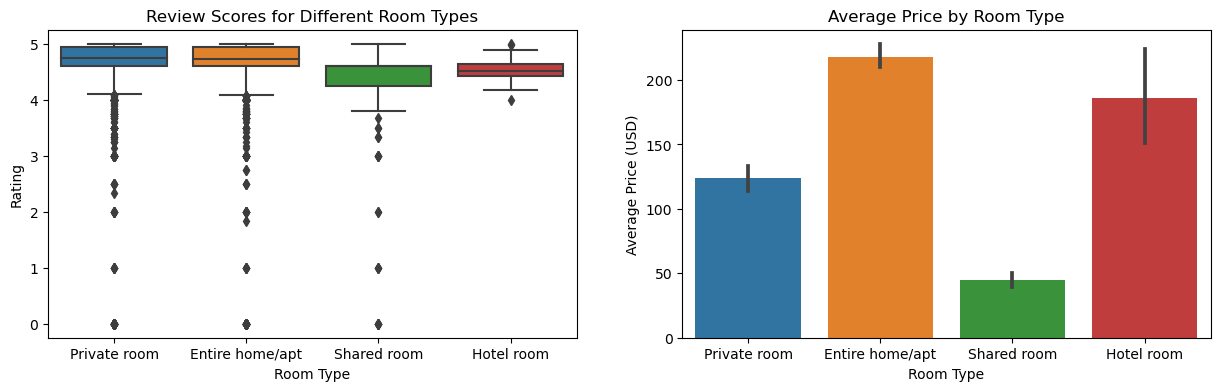

In [51]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
sns.boxplot(x='room_type', y='review_scores_rating', data=cleaned_data_no_otiliers)
plt.title('Review Scores for Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Rating')

plt.subplot(1,2,2)
sns.barplot(x='room_type', y='price', data=cleaned_data_no_otiliers)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price (USD)')
plt.show()

###### The graphs provide a comparative analysis of different room types based on review scores and average prices.
Private Room presents a high median review score close to 5, with a relatively narrow interquartile range (IQR).  The average price is moderate, below 150. This is a cost-effective option.
Entire Home/apt: Also has a high median review score similar to the private room, with a slightly wider IQR, but it has the highest average price, exceeding 200. High review scores but at a premium price, suggesting a higher cost for additional privacy and space.
Shared Room: Lower median review score compared to Private Room and Entire Home/apt, with a wider IQR and more significant outliers indicating variability in guest satisfaction. Presents the lowest average price, significantly below 100. With this indicating cost savings at the expense of lower satisfaction.
Hotel Room: High median review score, comparable to Private Room and Entire Home/apt, but with a narrower IQR. This indicates consistent guest satisfaction, though some outliers are present. The average price is higher than Private Room but lower than Entire Home/apt, around 150-200, suggesting a balance between cost and satisfaction.
###### Analysing the two graphs it is possible to notice that: 
Best Overall Choice based on review scores and price is Private Rooms, because it offer the best value, combining high satisfaction with moderate costs. For those looking for privacy and are willing to spend more, Entire Home/apt is a good choice, offering high review scores but at a higher price. Shared Rooms are the most cost-effective for budget travelers, but they come with the trade-off of lower review scores. Hotel Rooms provide a middle ground, with high review scores and prices lower than Entire Home/apt but higher than Private Rooms and Shared Rooms.
###### Private rooms stand out as the most balanced and cost-effective option. For Entire Home/apt and Hotel rooms, the higher prices are justified by their high review scores, indicating that customers are generally satisfied with the value they receive for the price paid.



#### Statistical Analysis

In [97]:
print("Mean of review score rating when roon type = private room:", cleaned_data_no_otiliers[cleaned_data_no_otiliers['room_type'] == 'Private room']['review_scores_rating'].mean())
print("Mean of review score rating when roon type = Entire home/apt:", cleaned_data_no_otiliers[cleaned_data_no_otiliers['room_type'] == 'Entire home/apt']['review_scores_rating'].mean())
print("Mean of review score rating when roon type = Shared room:", cleaned_data_no_otiliers[cleaned_data_no_otiliers['room_type'] == 'Shared room']['review_scores_rating'].mean())
print("Mean of review score rating when roon type = Hotel room:", cleaned_data_no_otiliers[cleaned_data_no_otiliers['room_type'] == 'Hotel room']['review_scores_rating'].mean())

print("Mean of review score rating", cleaned_data_no_otiliers['review_scores_rating'].mean())

Mean of review score rating when roon type = private room: 4.606556939180767
Mean of review score rating when roon type = Entire home/apt: 4.617497574580532
Mean of review score rating when roon type = Shared room: 4.244401380484549
Mean of review score rating when roon type = Hotel room: 4.53102949635322
Mean of review score rating 4.603235309339778


###### As we can see, the mean for review score rating of Entire home/apt and private room are above the average review score rating mean, which suggest thatg hosts tend to rating higher this tyes of room.

In [99]:
print("Mean of price when roon type = private room:", cleaned_data_no_otiliers[cleaned_data_no_otiliers['room_type'] == 'Private room']['price'].mean())
print("Mean of price when roon type = Entire home/apt:", cleaned_data_no_otiliers[cleaned_data_no_otiliers['room_type'] == 'Entire home/apt']['price'].mean())
print("Mean of price when roon type = Shared room:", cleaned_data_no_otiliers[cleaned_data_no_otiliers['room_type'] == 'Shared room']['price'].mean())
print("Mean of price when roon type = Hotel room:", cleaned_data_no_otiliers[cleaned_data_no_otiliers['room_type'] == 'Hotel room']['price'].mean())

print("Mean of price", cleaned_data_no_otiliers['price'].mean())

Mean of price when roon type = private room: 123.57784671532846
Mean of price when roon type = Entire home/apt: 217.79503433703115
Mean of price when roon type = Shared room: 44.49142857142857
Mean of price when roon type = Hotel room: 185.76190476190476
Mean of price 169.24577528089887


###### As we can see, the mean price of Entire home/apt and hotel room are above the average price mean, which suggest that private room is a good choice for hosts as it tend to have a price bellow the mean and rating above it.

### Analysis 4: Analysing host response rating vs review_scores_rating.

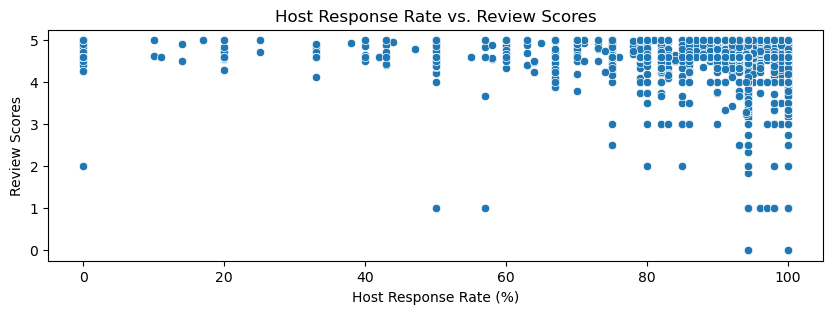

In [63]:
plt.figure(figsize=(10, 3))
sns.scatterplot(x='host_response_rate', y='review_scores_rating', data=cleaned_data_no_otiliers)
plt.title('Host Response Rate vs. Review Scores')
plt.ylabel('Review Scores')
plt.xlabel('Host Response Rate (%)')
plt.show()

###### The scatter plot illustrates the relationship between Host Response Rate (on the x-axis) representing how quickly hosts respond to inquiries from potential guests and Review Scores (on the y-axis) reflecting guest satisfaction based on their experiences during their stay. Where:
There appears to be a positive correlation between Host Response Rate and Review Scores. As the host’s response rate increases, review scores tend to be higher. Listings with hosts who promptly respond to inquiries tend to have better guest satisfaction.
While many listings with high response rates (close to 100%) have review scores clustered in the upper range (4-5), there are exceptions.

A dense cluster of data points exists at the top right corner, suggesting many listings have both high response rates and high review scores.

Some listings with high response rates still receive lower review scores, indicating that other factors also influence guest satisfaction. 
Outliers exist where some listings have low response rates but relatively high review scores or vice versa.

#### Statistical Analysis

In [103]:
# Correlation Analysis
correlation, p_value = pearsonr(cleaned_data_no_otiliers['host_response_rate'], cleaned_data_no_otiliers['review_scores_rating'])

print("Correlation Analysis:")
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation Analysis:
Pearson correlation coefficient: 0.03201044566373287
P-value: 0.005362251796594226


As we can see, there is a statistically significant (P-value = 0.005) but very weak positive correlation (Pearson Correlation Coefficient = 0.032) between the host response rate and review scores. This means that while there is a slight tendency for higher host response rates to be associated with higher review scores, the relationship is not strong.

### Analysis 5: Analysing the price vs the number of guest accommodated.

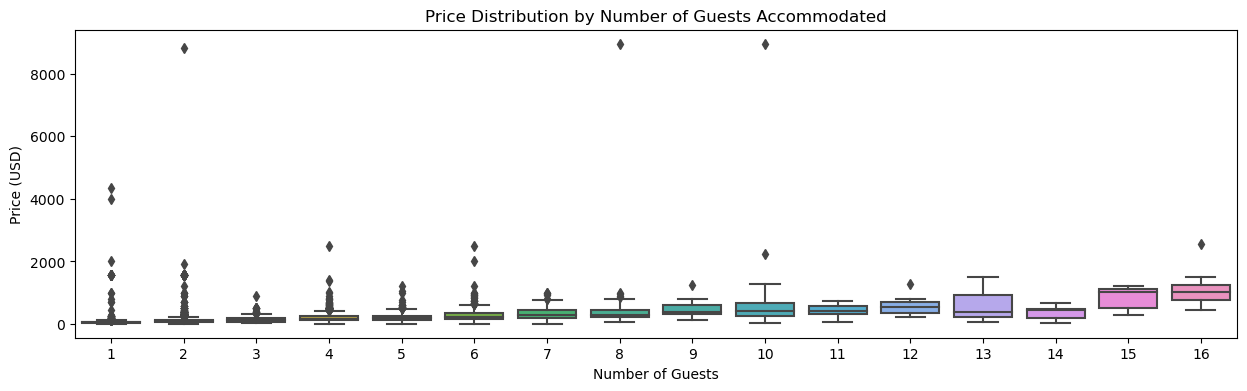

In [72]:
plt.figure(figsize=(15, 4))
sns.boxplot(x='accommodates', y='price', data=cleaned_data_no_otiliers)
#plt.plot(cleaned_data_no_otiliers['accommodates'], cleaned_data_no_otiliers['price'])
plt.title('Price Distribution by Number of Guests Accommodated')
plt.ylabel('Price (USD)')
plt.xlabel('Number of Guests')
plt.show()

###### The graph depicts how the price of accommodations varies based on the number of guests they can accommodate. The horizontal axis represents the number of guests, ranging from 1 to 16. The vertical axis represents the price in USD.
Up to approximately 6 guests, there is a positive correlation between guest capacity and median price. As the accommodation capacity increases, the median price tends to rise. Beyond 6 guests, the relationship becomes less consistent. Notable outliers exist where prices are significantly higher than expected for specific guest capacities. These outliers could represent luxury accommodations or unique features.

The graph shows a dense cluster of data points at higher guest capacities. Some listings achieve high prices despite accommodating fewer guests.

Smaller accommodations (1-2 guests) tend to have lower average and median prices, making them more cost-effective.
Accommodations for larger groups (6+ guests) generally have higher prices and greater price variability. There is a wide range of prices within each group, indicating diverse offerings in the market.


###### For budget-conscious travelers, consider listings accommodating fewer than 6 guests. Listings accommodating exactly 6 guests seem to have less price variation.


### Statistical Analysis

In [105]:
# Descriptive Statistics
price_by_accommodates = cleaned_data_no_otiliers.groupby('accommodates')['price'].describe()
print("Price Distribution by Number of Guests Accommodated:")
print(price_by_accommodates)

Price Distribution by Number of Guests Accommodated:
               count         mean          std    min     25%     50%  \
accommodates                                                            
1              978.0    94.622699   265.045157   10.0   36.00    50.0   
2             3579.0   129.594381   246.149014   15.0   59.00    85.0   
3              417.0   142.937650    94.060618   20.0   80.00   120.0   
4             1354.0   199.963811   142.411667   15.0  120.00   169.0   
5              359.0   230.615599   150.592526   15.0  130.00   194.0   
6              517.0   285.837524   209.549380   15.0  160.00   237.0   
7              134.0   341.694030   211.048518   15.0  197.75   288.5   
8              132.0   421.250000   773.380212   75.0  220.00   300.0   
9               25.0   457.320000   243.112237  121.0  322.00   389.0   
10              32.0   776.375000  1550.972551   28.0  268.75   403.0   
11               8.0   438.250000   231.023035   55.0  325.00   430.0  

As shown in the descriptive analysis, prices increase as the number of guests accommodated increases. For example, the average price for one guest is 94.62, while for ten guests, it is 776.38.
Price Variability:

There is substantial variability in prices within each group, as indicated by high standard deviations. This means prices can vary widely for accommodations of the same size.

The median price also rises with capacity, indicating a general trend of higher prices for larger accommodations.

The IQR, representing the middle of prices, widens as the number of guests increases, suggesting more price dispersion for larger groups.

### Analysis 6: Analysis of the number of reviews vs rating of the listing.

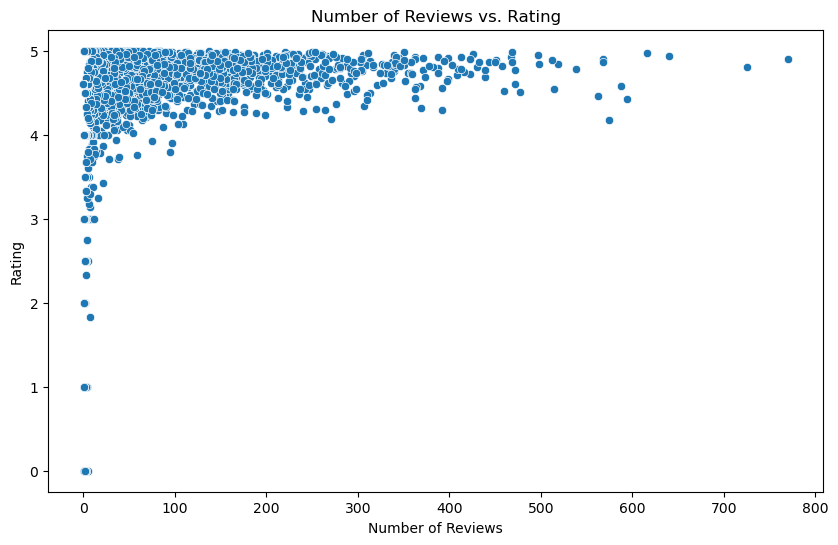

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', data=cleaned_data_no_otiliers)
plt.title('Number of Reviews vs. Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

###### The graph displays the relationship between Number of Reviews (on the x-axis) and Overall Review Scores (on the y-axis), where:
Initially, listings with fewer reviews tend to have higher ratings (dense cluster near the top left corner). As the number of reviews increases, there is a spread and gradual decrease in ratings.

###### Analysing the graph it is possible to notice that there is a Negative Correlation, where:
Listings with very high review counts do not necessarily have perfect ratings. More reviews lead to diverse opinions and experiences, resulting in a wider range of scores. Some listings have both high review counts and high ratings, but they are relatively rare.

Dense clustering at the top left corner indicates many listings with high ratings and relatively few reviews.


### Statistical Analysis

In [106]:
# Correlation Analysis
correlation, p_value = pearsonr(cleaned_data_no_otiliers['number_of_reviews'], cleaned_data_no_otiliers['review_scores_rating'])

print("Correlation Analysis:")
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation Analysis:
Pearson correlation coefficient: 0.09852651298771882
P-value: 8.770718170618133e-18


As we can see, the correlation coefficient is approximately 0.099, which suggests a very weak positive correlation between the number of reviews and the rating.
The p-value is very small approximately 8.77, indicating that the correlation is statistically significant.

In summary, although there is a statistically significant correlation between the number of reviews and the rating, it is very weak, suggesting that there may not be a strong linear relationship between Number of Reviews and Rating.

### Analysis 7: Analysing the relationship between the availability in the next 90 days and the price of the listing.

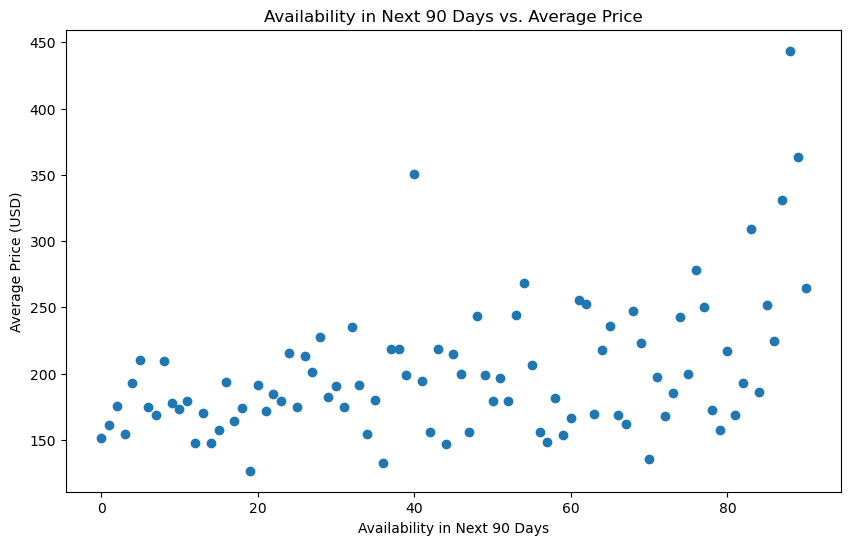

In [109]:
plt.figure(figsize=(10, 6))
avg_review_scores_accommodates = cleaned_data_no_otiliers.groupby('availability_90')['price'].mean()
plt.scatter(avg_review_scores_accommodates.index, avg_review_scores_accommodates.values)
#sns.scatterplot(x='price', y='availability_30', data=cleaned_data_no_otiliers)
plt.title('Availability in Next 90 Days vs. Average Price')
plt.ylabel('Average Price (USD)')
plt.xlabel('Availability in Next 90 Days')
plt.show()

###### The scatter plot displays the variables Availability in Next 90 Days (on the x-axis), and Average Price (in USD) (on the y-axis), where:
There is a weak positive Relationship where Listings with higher availability in the next 90 days tend to have slightly higher average prices.

The graph slighgly suggest that low avaliability is correlated to lower price; High-availability listings have higher prices.

### Statistical Analysis

In [107]:
# Correlation Analysis
correlation, p_value = pearsonr(cleaned_data_no_otiliers['availability_90'], cleaned_data_no_otiliers['price'])

print("Correlation Analysis:")
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation Analysis:
Pearson correlation coefficient: 0.08715360095598719
P-value: 3.1123689642074896e-14


As we can see, while there is a statistically significant relationship between Availability in the Next 90 Days and Average Price, the strength of this relationship is very weak. As the Pearson correlation coefficient of 0.087 indicates a very weak positive linear relationship and the p-value of approximately 3.11 is extremely low, indicating that the observed correlation is statistically significant.